In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Câu 1:
Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?

In [3]:
def f(x):
  return x**2 + np.random.rand()*2

In [5]:
df = pd.DataFrame()
x_10 = []
y_10 = []


for i in range(-5, 5):
  x_10.append(i)
  y_10.append(f(i))

x_100 = x_10.copy()
y_100 = y_10.copy()

for i in range(-50, 50):
  x_100.append(i)
  y_100.append(f(i))



x_10 = np.array(x_10)
y_10 = np.array(y_10)
x_100 = np.array(x_100)
y_100 = np.array(y_100)


In [6]:
x_10

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

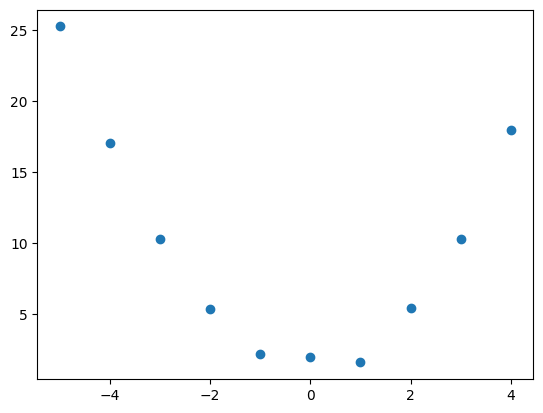

In [7]:
plt.scatter(x_10, y_10)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf = PolynomialFeatures(degree = 9)
X_10_poly = pf.fit_transform(x_10.reshape(-1, 1))
X_100_poly = pf.fit_transform(x_100.reshape(-1, 1))

regress = LinearRegression()
regress.fit(X_10_poly, y_10)

LinearRegression()

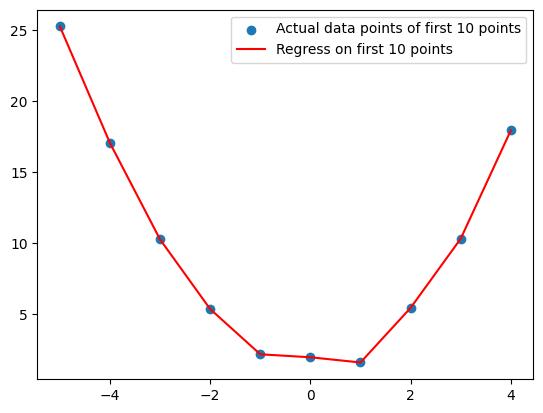

In [9]:
plt.scatter(x_10, y_10, label = "Actual data points of first 10 points")
plt.plot(x_10, regress.predict(X_10_poly), label = "Regress on first 10 points", color = "red")

plt.legend()

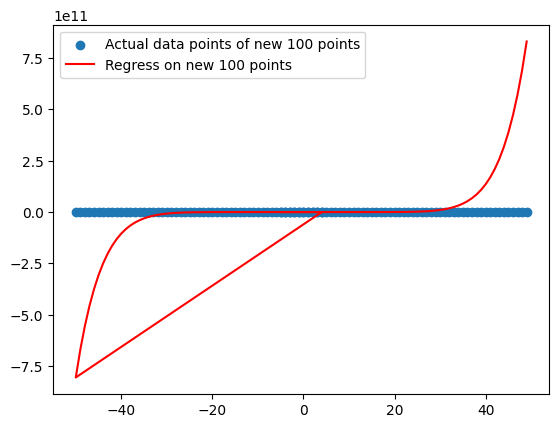

In [10]:
# regress.fit(X_100_poly, y_100)
plt.scatter(x_100, y_100, label = "Actual data points of new 100 points")
plt.plot(x_100, regress.predict(X_100_poly), label = "Regress on new 100 points", color = "red")

plt.legend()

In [11]:
from sklearn.metrics import mean_squared_error

- Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)

In [12]:
eval_df = pd.DataFrame()
eval_df["first 10 points"] = [mean_squared_error(y_10, regress.predict(X_10_poly))]
eval_df["last 100 points"] = [mean_squared_error(y_100, regress.predict(X_100_poly))]
eval_df

,first 10 points,last 100 points
0,1.450610e-23,3.809456e+22


- Hiện tượng gì đang xảy ra?

Trong trường hợp 10 điểm dữ liệu ban đầu mse rất nhỏ còn khi thêm 100 điểm sau model cho mse rất cao. Điều này cho thấy model đang bị overfit, lúc này hàm đa thức bậc 9 quá phức tạp và các hệ số được điều chỉnh để fit với 10 điểm ban đầu nhưng với 100 điểm sau thì hàm không đủ khái quát để dự đoán các điểm này.

# Câu 2: Code from scratch
Implement hàm tính convolution
- Input: X, W, stride, padding
- Output: Y


In [13]:
import torch
import torch.nn as nn

In [14]:
def pad(X, padding):
  output = np.zeros((X.shape[0] + padding[0] * 2, X.shape[1] + padding[1] * 2))
  if padding[0] + padding[1] > 0:
    output[padding[0]:-(padding[0]), padding[1]:-(padding[1])] = X
  else:
    output = X
  return output


def convolution(X, W, stride, padding):
  padded = pad(X, padding)
  output_height = int(((X.shape[0] - W.shape[0] + 2 * padding[0]) / stride[0]) + 1)
  output_width = int(((X.shape[1] - W.shape[1] + 2 * padding[1]) / stride[1]) + 1)
  out = np.zeros((output_height, output_width))
  for y in range(0, output_width):
      for x in range(0, output_height):
        out[x, y] = np.sum(padded[x * stride[0] : x * stride[0] + W.shape[0], y * stride[1]:y * stride[1] + W.shape[1]] * W)
  return out

In [15]:
X = np.array([[1., 0., 1., 1., 1., 0, 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
W = np.array([[1, 0, 1],
              [0, 0, 0],
              [1, 1,1]])

In [16]:
np.array([[1, 0, 1],
              [0, 0, 0]]).shape

(2, 3)

In [17]:
kernel = torch.tensor(
              [[1, 0, 1],
              [0, 0, 0],
              [1, 1,1]], dtype=torch.float32)
kernel = kernel.reshape(1, 1, 3, 3)

image = torch.tensor(
      [[1., 0., 1., 1., 1., 0, 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=torch.float32)
image = image.reshape(1, 1, 10, 10)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding = (1, 2), stride = (2, 1), bias=False)

conv.weight = nn.Parameter(kernel)
output = conv(image)

print('Output Shape from pytorch:',output.shape)
print('Output from pytorch \n',output)

output_implement = convolution(X,W, stride = (2, 1), padding = (1, 2))

print('Output Shape from implemented function:',output_implement.shape)
print('Output from from implemented function \n',output_implement)
print('Is two output the same?: ', np.array_equal(output.detach().numpy().reshape(output_implement.shape), output_implement))

Output Shape from pytorch: torch.Size([1, 1, 5, 12])
Output from pytorch 
 tensor([[[[1., 2., 3., 2., 2., 2., 2., 2., 1., 2., 1., 1.],
          [2., 2., 4., 2., 4., 3., 3., 4., 2., 5., 2., 2.],
          [2., 2., 5., 3., 4., 3., 3., 5., 4., 5., 3., 2.],
          [2., 3., 4., 4., 2., 4., 3., 5., 5., 5., 3., 2.],
          [2., 3., 4., 5., 3., 5., 4., 5., 5., 5., 3., 2.]]]],
       grad_fn=<ConvolutionBackward0>)
Output Shape from implemented function: (5, 12)
Output from from implemented function 
 [[1. 2. 3. 2. 2. 2. 2. 2. 1. 2. 1. 1.]
 [2. 2. 4. 2. 4. 3. 3. 4. 2. 5. 2. 2.]
 [2. 2. 5. 3. 4. 3. 3. 5. 4. 5. 3. 2.]
 [2. 3. 4. 4. 2. 4. 3. 5. 5. 5. 3. 2.]
 [2. 3. 4. 5. 3. 5. 4. 5. 5. 5. 3. 2.]]
Is two output the same?:  True


In [18]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding = (2, 2), stride = (2, 3), bias=False)

conv.weight = nn.Parameter(kernel)
output = conv(image)

print('Output Shape from pytorch:',output.shape)
print('Output from pytorch \n',output)

output_implement = convolution(X,W, stride = (2, 3), padding = (2, 2))

print('Output Shape from implemented function:',output_implement.shape)
print('Output from from implemented function \n',output_implement)
print('Is two output the same?: ', np.array_equal(output.detach().numpy().reshape(output_implement.shape), output_implement))

Output Shape from pytorch: torch.Size([1, 1, 6, 4])
Output from pytorch 
 tensor([[[[1., 2., 1., 3.],
          [2., 4., 4., 5.],
          [2., 3., 2., 4.],
          [2., 3., 1., 4.],
          [2., 5., 3., 4.],
          [1., 2., 1., 1.]]]], grad_fn=<ConvolutionBackward0>)
Output Shape from implemented function: (6, 4)
Output from from implemented function 
 [[1. 2. 1. 3.]
 [2. 4. 4. 5.]
 [2. 3. 2. 4.]
 [2. 3. 1. 4.]
 [2. 5. 3. 4.]
 [1. 2. 1. 1.]]
Is two output the same?:  True


In [19]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding = (0, 0), stride = (1, 1), bias=False)

conv.weight = nn.Parameter(kernel)
output = conv(image)

print('Output Shape from pytorch:',output.shape)
print('Output from pytorch \n',output)

output_implement = convolution(X,W, stride = (1, 1), padding = (0, 0))

print('Output Shape from implemented function:',output_implement.shape)
print('Output from from implemented function \n',output_implement)
print('Is two output the same?: ', np.array_equal(output.detach().numpy().reshape(output_implement.shape), output_implement))

Output Shape from pytorch: torch.Size([1, 1, 8, 8])
Output from pytorch 
 tensor([[[[5., 4., 5., 4., 4., 4., 4., 5.],
          [4., 2., 4., 3., 3., 4., 2., 5.],
          [4., 3., 2., 2., 2., 3., 3., 4.],
          [5., 3., 4., 3., 3., 5., 4., 5.],
          [3., 3., 2., 2., 1., 2., 1., 4.],
          [4., 4., 2., 4., 3., 5., 5., 5.],
          [4., 5., 3., 3., 3., 4., 3., 4.],
          [4., 5., 3., 5., 4., 5., 5., 5.]]]], grad_fn=<ConvolutionBackward0>)
Output Shape from implemented function: (8, 8)
Output from from implemented function 
 [[5. 4. 5. 4. 4. 4. 4. 5.]
 [4. 2. 4. 3. 3. 4. 2. 5.]
 [4. 3. 2. 2. 2. 3. 3. 4.]
 [5. 3. 4. 3. 3. 5. 4. 5.]
 [3. 3. 2. 2. 1. 2. 1. 4.]
 [4. 4. 2. 4. 3. 5. 5. 5.]
 [4. 5. 3. 3. 3. 4. 3. 4.]
 [4. 5. 3. 5. 4. 5. 5. 5.]]
Is two output the same?:  True


# Câu 3:
Cho dataset CIFAR-10
Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch



In [20]:
from torchvision import datasets
from torchvision import transforms
to_tensor = transforms.ToTensor()
cifar = datasets.CIFAR10(root = ".", train = True, download = True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:03<00:00, 44143773.36it/s]


Extracting ./cifar-10-python.tar.gz to .


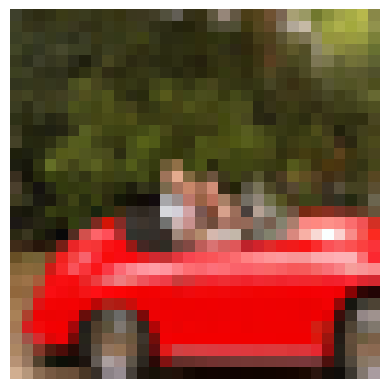

In [22]:
image = cifar[99][0]
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

In [23]:
image.min(), image.max()

(tensor(0.), tensor(1.))

In [24]:
 images = torch.stack([img for img, _ in cifar], dim = 3)
 images.shape

torch.Size([3, 32, 32, 50000])

In [25]:
normalize = transforms.Normalize(images.view(3, -1).mean(dim = 1), images.view(3, -1).std(dim = 1))
cifar_normalized_train = datasets.CIFAR10(root = ".", train = True, download = False, transform=transforms.Compose([to_tensor, normalize]))
cifar_normalized_test = datasets.CIFAR10(root = ".", train = False, download = False, transform=transforms.Compose([to_tensor, normalize]))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

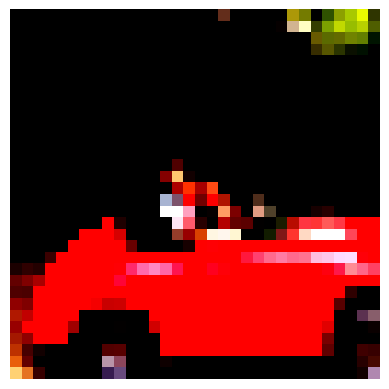

In [26]:
image = cifar_normalized_train[99][0]
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

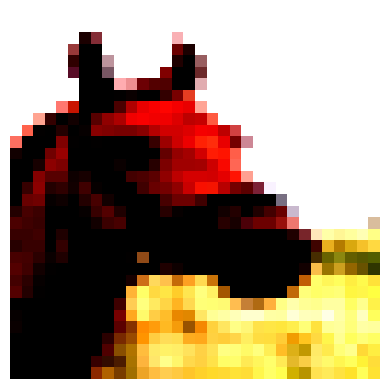

In [28]:
image = cifar_normalized_test[99][0]
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.show()

In [27]:
image.shape

torch.Size([3, 32, 32])

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(cifar_normalized_train, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(cifar_normalized_test, batch_size = 1, shuffle = False)

In [86]:
from torch.nn.modules.pooling import MaxPool2d
from collections import OrderedDict

class VGG16(nn.Module): # 3 convolution layers
  def __init__(self, numclasses):
    super().__init__()
    self.features = nn.Sequential(
        # conv 1
        nn.Conv2d(3, 64, 3, padding = 1), # conv 1_1
        nn.Tanh(),
        nn.Conv2d(64, 64, 3, padding = 1), # conv 1_2
        nn.Tanh(),
        nn.MaxPool2d(2, stride = 2, return_indices = True),
        # conv 2
        nn.Conv2d(64, 128, 3, padding = 1), # conv 2_1
        nn.Tanh(),
        nn.Conv2d(128, 128, 3, padding = 1), # conv 2_2
        nn.Tanh(),
        nn.MaxPool2d(2, stride = 2, return_indices = True),
        # conv 3
        nn.Conv2d(128, 256, 3, padding = 1), # conv 3_1
        nn.Tanh(),
        nn.Conv2d(256, 256, 3, padding = 1), # conv 3_2
        nn.Tanh(),
        nn.Conv2d(256, 256, 3, padding = 1), # conv 3_3
        nn.Tanh(),
        nn.MaxPool2d(2, stride = 2, return_indices = True)
    )
    self.classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Linear(4096, numclasses))
    self.conv_layer_indices = [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]
    self.feature_maps = OrderedDict()
    self.pool_locs = OrderedDict()

  def forward(self, x):
      for layer in self.features:
        if isinstance(layer, nn.MaxPool2d):
            x, location = layer(x)

        else:
            x = layer(x)

      x = x.reshape(x.size(0), -1)
      x = self.classifier(x)
      return x

In [98]:
def plot_loss(losses, lr, iter):
  fig, ax = plt.subplots()
  ax.plot(range(1, iter + 1), losses)
  ax.set_title(f"loss of NeuralNetworkClassifier learning rate {lr}")

- Chỉnh learning rate, vẽ đồ thị loss tương ứng.

In [104]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
  losses = []
  for epoch in range(1, n_epochs + 1):
      loss_train = 0.0
      for imgs, labels in train_loader:
          imgs = imgs.to(device)
          labels = labels.to(device)
          outputs = model(imgs)
          loss = loss_fn(outputs, labels)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          loss_train += loss.item()
      print ('Epoch [{}/{}], Loss: {:.4f}'
          .format(epoch+1, n_epochs, loss_train / len(train_loader)))
      losses.append(loss_train)

  return losses

Epoch [2/5], Loss: 2.3023
Epoch [3/5], Loss: 2.3015
Epoch [4/5], Loss: 2.3003
Epoch [5/5], Loss: 2.2983
Epoch [6/5], Loss: 2.2942


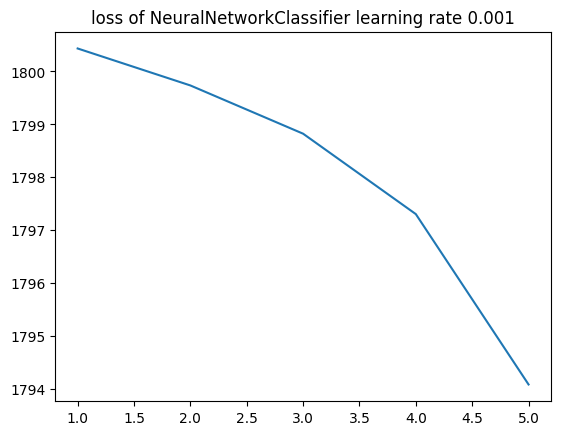

In [106]:
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.001

model = VGG16(10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

losses = training_loop(
    n_epochs = num_epochs,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = test_loader
)
plot_loss(losses, learning_rate, num_epochs)

Epoch [2/5], Loss: 1.9413
Epoch [3/5], Loss: 1.4433
Epoch [4/5], Loss: 1.1778
Epoch [5/5], Loss: 0.9944
Epoch [6/5], Loss: 0.8713


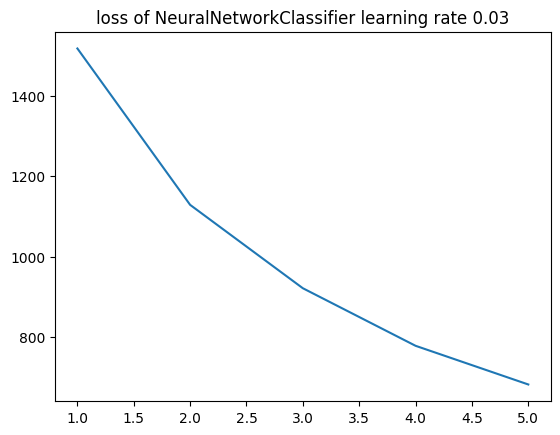

In [109]:
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.03

model = VGG16(10).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

losses = training_loop(
    n_epochs = num_epochs,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
    val_loader = test_loader
)
plot_loss(losses, learning_rate, num_epochs)

Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

In [110]:
with torch.no_grad():
    predictions = []
    labels_l = []
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.append(predicted.item())
        labels_l.append(labels.item())
        del images, labels, outputs

In [112]:
from sklearn.metrics import classification_report
print(classification_report(predictions, labels_l))

              precision    recall  f1-score   support

           0       0.95      0.31      0.47      3085
           1       0.79      0.74      0.76      1065
           2       0.46      0.56      0.51       829
           3       0.27      0.60      0.37       442
           4       0.53      0.62      0.57       845
           5       0.57      0.62      0.59       921
           6       0.49      0.89      0.63       553
           7       0.60      0.80      0.68       745
           8       0.56      0.74      0.64       749
           9       0.58      0.75      0.65       766

    accuracy                           0.58     10000
   macro avg       0.58      0.66      0.59     10000
weighted avg       0.68      0.58      0.57     10000

